### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading train dataset

In [3]:
train_data = pd.read_excel('train/train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All the data is of string type we therefore need to do lots of preprocessing here. As the model will take numerical values.

In [5]:
train_data.shape

(10683, 11)

Let's explore some of the columns first before we start

In [6]:
train_data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
31h 30m      1
3h 25m       1
36h 25m      1
41h 20m      1
35h 35m      1
Name: Duration, Length: 368, dtype: int64

#### Check for null values

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is one null value in the Route column only therefore we can drop the row corresponding to the null value

In [8]:
train_data.dropna(inplace=True,axis=0)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Here we have removed the null value

In [10]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


#### EDA

We can see that the Date_of_Journey column has dates but it is a object data type.
Therefore, we have to convert this datatype into timestamp, a suitable format for processing dates and times.

#### Transforming our dates in Date_of_Journey into suitable format

For this we'll use pandas **to_datetime** method
- dt.day will give day from that date
- dt.month will give month from that date

In [11]:
pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int64

In [12]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month

In [13]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [14]:
train_data['Journey_year'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.year

In [15]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


Now we can drop our Date_of_Journey column as we already have the information in separate columns in integer format
#### Dropping Date_of_Journey column

In [16]:
train_data.drop(columns=['Date_of_Journey'], axis=1, inplace=True)

In [17]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [18]:
train_data.Journey_year.value_counts()

2019    10682
Name: Journey_year, dtype: int64

Now we can see that the dataset contain only 2019 year, It's not that important here. So we can drop that columns also

#### Transforming the Dep_Time into suitable format

Departure time is when a plane leaves the airport.
We can extract the hour and minutes in a separte coloumn and drop the Dep_Time

In [19]:
pd.to_datetime(train_data.Dep_Time,format='%H:%M').dt.hour

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_Time, Length: 10682, dtype: int64

In [20]:
# Extracting hour
train_data['Dep_hour'] = pd.to_datetime(train_data.Dep_Time,format='%H:%M').dt.hour
# Extracting minutes
train_data['Dep_min'] = pd.to_datetime(train_data.Dep_Time, format='%H:%M').dt.minute

**Dropping Dep_Time from column**

In [21]:
train_data.drop(columns=['Dep_Time'],axis=1,inplace=True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


#### Transforming the Arrival_Time into suitable format

Arrival time is when a plane arrives the airport.
We can extract the hour and minutes in a separte coloumn and drop the Arrival_Time

In [23]:
pd.to_datetime(train_data.Arrival_Time).dt.hour

0         1
1        13
2         4
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time, Length: 10682, dtype: int64

In [24]:
# Extracting hour
train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
# Extracting Minutes
train_data['Arrival_min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

**Dropping the Arrival_Time column**

In [25]:
# train_data.drop(columns=['Arrival_Time'],axis=1,inplace=True)

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


We can see that for some journey the Arrival Day in Arrival_Time is different than the Day in Date_of_journey

#### Extracting Arrival Day and Arrival Month from Arrival_Time

In [27]:
pd.to_datetime('01:10 22 Mar',format='%H:%M %d %b').month

3

In [28]:
# def test_format_arrival_time(x):
#     i= 0
#     for e in x:
#         try:
#             print(pd.to_datetime(e,format='%H:%M %d %b').day,end=' ')
#             print(pd.to_datetime(e,format='%H:%M %d %b').month)
#         except:
#             print(train_data.Journey_day[i], end=' ')
#             print(train_data.Journey_month[i])
#         i+=1

In [29]:
# train_data.Arrival_Time[:5]

In [30]:
# format_arrival_time(train_data.Arrival_Time[:5])

**Dropping the row data earlier caused changes in the index therefore we'll reset the index**

In [31]:
train_data = train_data.reset_index(drop=True)

In [32]:
train_data.tail()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
10677,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10678,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10679,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10680,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10
10681,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,19:15,8h 20m,2 stops,No info,11753,9,5,2019,10,55,19,15


In [33]:
def format_arrival_time(arrival_time):
    train_data['Arrival_day'] = 0
    train_data['Arrival_month'] = 0
    for i in range(arrival_time.shape[0]):
        try:
            train_data['Arrival_day'][i] = pd.to_datetime(arrival_time[i],format='%H:%M %d %b').day
            train_data['Arrival_month'][i] = pd.to_datetime(arrival_time[i],format='%H:%M %d %b').month
        except:
            train_data['Arrival_day'][i] = train_data.Journey_day[i]
            train_data['Arrival_month'][i] = train_data.Journey_month[i]

In [34]:
format_arrival_time(train_data.Arrival_Time)

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,1,3


Here we have extracted the Arrival_hour, Arrival_min, Arrival_day and Arrival_month from the Arrival_Time

Here we can see that in the first row the Journey start day in Journey_day is greater than the Arrival_day. This shows that our Arrival day contains some false data. Let's correct this data first.

In [36]:
train_data.Journey_day.unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21], dtype=int64)

In [37]:
train_data.Arrival_day.unique()

array([22,  1, 10, 12, 24, 13,  2, 27, 18,  4, 15, 28,  6, 19,  3,  7, 16,
       21,  9, 25, 20, 23, 11,  8,  5, 26, 29, 17], dtype=int64)

In [38]:
train_data.shape

(10682, 18)

In [39]:
count = 0
for i in range(0,train_data.shape[0]):
    if train_data.Journey_day[i] > train_data.Arrival_day[i]:
        count += 1
print("Number of false day data in Arrival_day: ",count)

Number of false day data in Arrival_day:  89


In [40]:
train_data_new_false = train_data[train_data.Journey_day > train_data.Arrival_day]
train_data_new_false['Error_by_days'] = train_data_new_false.Arrival_day - train_data_new_false.Journey_day
train_data_new_false

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Error_by_days
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,22,3,-2
21,Air India,Banglore,New Delhi,BLR → COK → DEL,13:20 19 Mar,15h 20m,1 stop,No info,6955,21,3,2019,22,0,13,20,19,3,-2
110,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 16 Mar,15h,1 stop,No info,13555,18,3,2019,14,5,5,5,16,3,-2
379,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,09:00 16 Mar,16h 5m,1 stop,In-flight meal not included,11087,18,3,2019,16,55,9,0,16,3,-2
605,Air India,Banglore,New Delhi,BLR → COK → DEL,10:50 19 Mar,12h 50m,1 stop,No info,6955,21,3,2019,22,0,10,50,19,3,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:15 16 Mar,20h 35m,1 stop,No info,12284,18,3,2019,11,40,8,15,16,3,-2
10488,IndiGo,Chennai,Kolkata,MAA → CCU,00:30 13 Mar,2h 25m,non-stop,No info,6297,15,3,2019,22,5,0,30,13,3,-2
10589,Air Asia,Banglore,New Delhi,BLR → DEL,02:10 22 Mar,2h 45m,non-stop,No info,3383,24,3,2019,23,25,2,10,22,3,-2
10637,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,11:25 19 Mar,14h,1 stop,In-flight meal not included,7832,21,3,2019,21,25,11,25,19,3,-2


In [41]:
train_data_new_false.Error_by_days.value_counts()

-2    84
-5     4
-1     1
Name: Error_by_days, dtype: int64

In [42]:
train_data_new_false[train_data_new_false.Error_by_days==-5]

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Error_by_days
3301,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,09:00 19 Mar,21h 20m,1 stop,In-flight meal not included,8147,24,3,2019,11,40,9,0,19,3,-5
4913,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,09:00 19 Mar,24h 5m,1 stop,In-flight meal not included,8147,24,3,2019,8,55,9,0,19,3,-5
4948,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,12:15 19 Mar,13h 25m,1 stop,In-flight meal not included,7832,24,3,2019,22,50,12,15,19,3,-5
8182,Air India,Banglore,New Delhi,BLR → HYD → VGA → DEL,22:55 19 Mar,29h 55m,2 stops,No info,8114,24,3,2019,17,0,22,55,19,3,-5


In [43]:
train_data_new_false[train_data_new_false.Error_by_days==-1]

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Error_by_days
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 02 Apr,1h 30m,non-stop,No info,1759,3,4,2019,22,45,0,15,2,4,-1


**Let's Drop these rows as correcting them does not seems reasonable when we have 10682 data and 89 have error**

In [44]:
for i in range(0,train_data.shape[0]):
    if train_data.Journey_day[i] > train_data.Arrival_day[i]:
        train_data.drop(index=i,axis=0 ,inplace=True)

**Dropping the row data earlier caused changes in the index therefore we'll reset the index**

In [45]:
train_data = train_data.reset_index(drop=True)

In [46]:
count = 0
for i in range(0,train_data.shape[0]):
    if train_data.Journey_day[i] > train_data.Arrival_day[i]:
        count += 1
print("Number of false day data in Arrival_day: ",count)

Number of false day data in Arrival_day:  0


**Dropping the Arrival_Time column as it is of no use to us now**

In [47]:
train_data.drop(columns=['Arrival_Time'],axis=1,inplace=True)

In [48]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,1,5
1,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,10,6


### Transforming the Duration column into suitable format

In [49]:
def transform_duraion(duration):
    train_data['Duration_hours'] = 0
    train_data['Duration_mins'] = 0
    for i in range(duration.shape[0]):
        if len(duration[i].split()) != 2: # Check if the duration contains both hour and mins
            if 'h' in duration[i]:
                duration[i] = duration[i].strip() + ' 0m' # Add 0 minute
            else:
                duration[i] = '0h ' + duration[i].strip() # Add 0 hour
                
        train_data['Duration_hours'][i] = int(duration[i].split(sep='h')[0])
        train_data['Duration_mins'][i] = int(duration[i].split(sep='m')[0].split()[-1])

In [50]:
transform_duraion(train_data.Duration)

In [51]:
train_data.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
10588,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,9,4,2,30
10589,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,27,4,2,35
10590,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,27,4,3,0
10591,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,1,3,2,40
10592,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,9,5,2019,10,55,19,15,9,5,8,20


**Dropping the Arrival_Time column as it is of no use to us now**

In [52]:
train_data.drop(columns=['Duration'],axis=1,inplace=True)

In [53]:
train_data.tail()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
10588,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,22,25,9,4,2,30
10589,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,27,4,2,35
10590,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,27,4,3,0
10591,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,14,10,1,3,2,40
10592,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753,9,5,2019,10,55,19,15,9,5,8,20


### Now we have cleaned out numerical data and date times

### Handling Categorical Data
**1. Nominal Data:** Data are not in order `OneHotEncoder`<br>
**2. Ordinal Data:** Data are in order `LabelEncoder`

### Starting with our Airline Column

In [54]:
train_data.Airline.value_counts()

Jet Airways                          3788
IndiGo                               2048
Air India                            1732
Multiple carriers                    1196
SpiceJet                              817
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Airline vs Price graph

In [55]:
train_data['Price'].groupby(train_data.Airline).sum()

Airline
Air Asia                              1779910
Air India                            16659890
GoAir                                 1137045
IndiGo                               11621581
Jet Airways                          44036447
Jet Airways Business                   350152
Multiple carriers                    13039603
Multiple carriers Premium economy      148445
SpiceJet                              3546958
Trujet                                   4140
Vistara                               3717975
Vistara Premium economy                 26887
Name: Price, dtype: int64

In [56]:
airline_vs_price = pd.DataFrame(train_data['Price'].groupby(train_data.Airline).sum())
airline_vs_price['Airline'] = airline_vs_price.index
airline_vs_price = airline_vs_price.reset_index(drop=True)
airline_vs_price

,Price,Airline
0,1779910,Air Asia
1,16659890,Air India
2,1137045,GoAir
3,11621581,IndiGo
4,44036447,Jet Airways
5,350152,Jet Airways Business
6,13039603,Multiple carriers
7,148445,Multiple carriers Premium economy
8,3546958,SpiceJet
9,4140,Trujet


### Airline vs Price graph using matplotlib

Generating random colors for different bars

In [57]:
import random
hexadecimal = []
for j in range(len(train_data.Airline.unique())):
    hexadecimal.append("#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))
print("A Random color is :",hexadecimal)

A Random color is : ['#08DAF3', '#3659A3', '#2B8F58', '#47D296', '#155218', '#A1D4F2', '#40C03B', '#7BDB82', '#40026A', '#EEABBB', '#5A7413', '#2178EB']


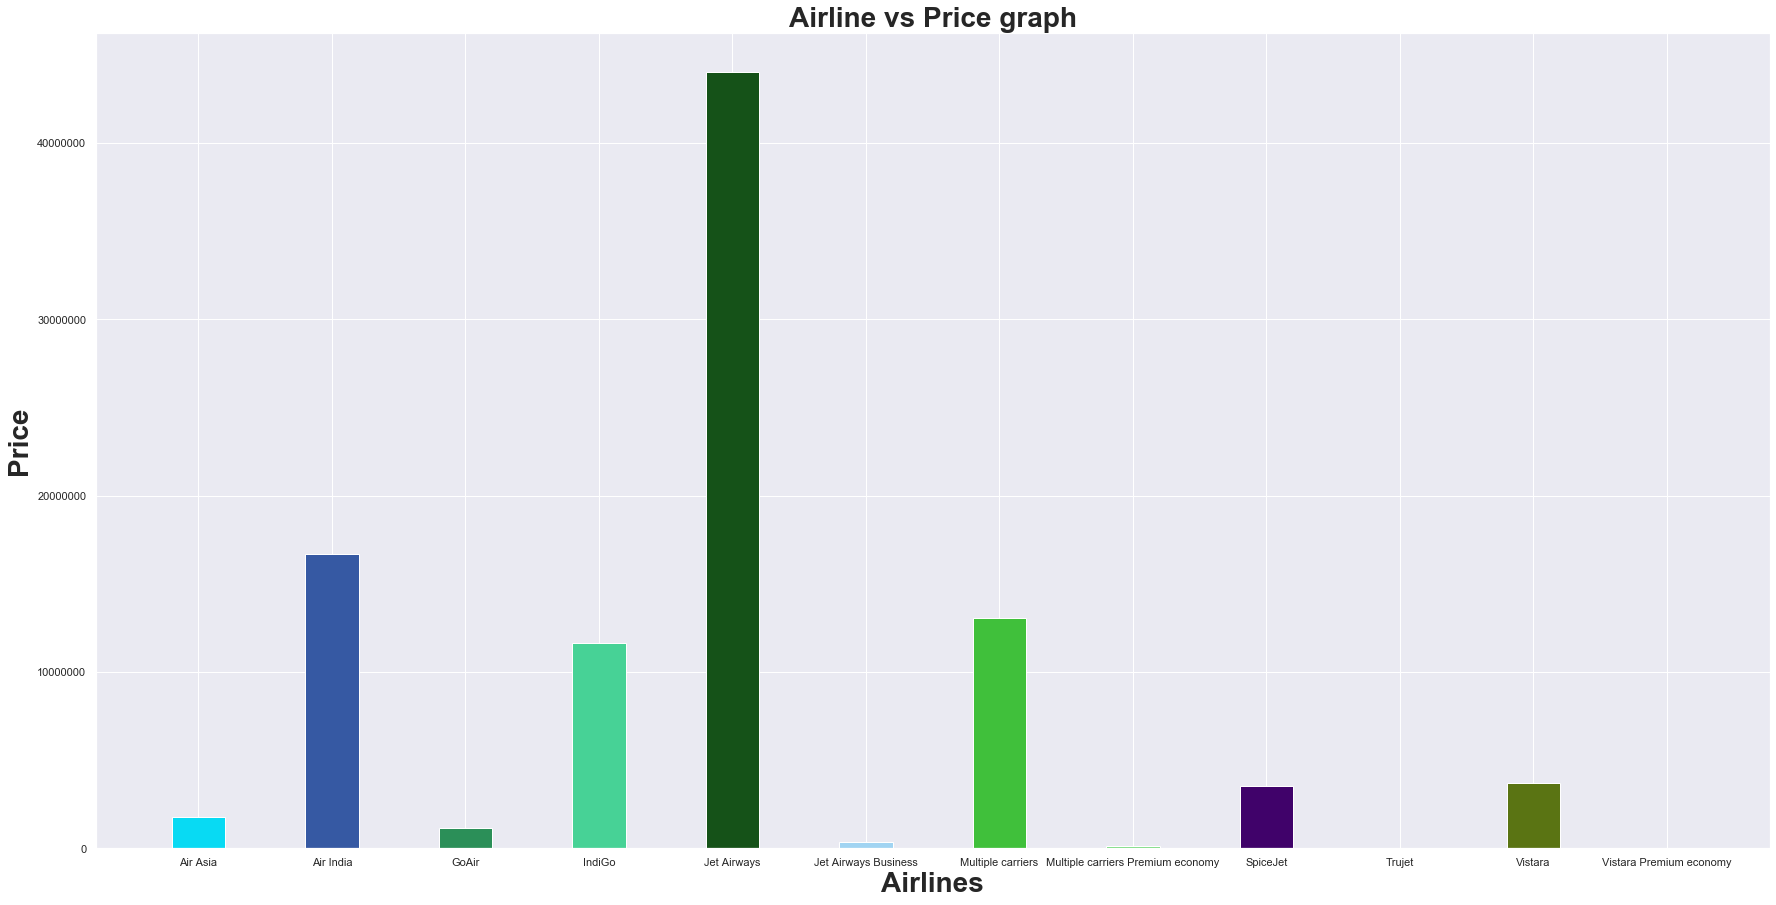

In [58]:
plt.figure(figsize=(30,15))
plt.ticklabel_format(style = 'plain') # keeps large number as numberic only not in exponential form

plt.bar(height=airline_vs_price.Price, x=airline_vs_price.Airline, 
        width=0.4, color=hexadecimal)
plt.title("Airline vs Price graph",size=28,fontweight="bold")
plt.xlabel("Airlines",size=28,fontweight="bold")
plt.ylabel("Price",size=28,fontweight="bold")
plt.show()

**We can see that Jet Airways earns a lot**

### Airline vs Price graph using seaborn

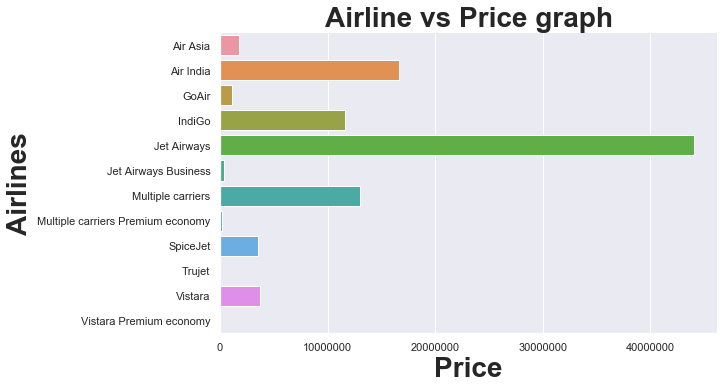

In [59]:
sns.catplot(x='Price',y='Airline', data=airline_vs_price, kind='bar',aspect=2)
plt.ticklabel_format(style = 'plain', axis = 'x')

plt.title("Airline vs Price graph",size=28,fontweight="bold")
plt.xlabel("Price",size=28,fontweight="bold")
plt.ylabel("Airlines",size=28,fontweight="bold")
plt.show()
plt.show()

Seaborn makes the plottin easier

**Let's check which airline price is mininum**

In [60]:
train_data[train_data.Price == train_data.Price.min()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
4036,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,21,3,2019,22,45,0,10,22,3,1,25
4243,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,2019,22,45,0,10,28,3,1,25
10426,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,2019,5,45,7,5,27,3,1,20


**Let's check which airline price is maximum**

In [61]:
train_data[train_data.Price == train_data.Price.max()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
2901,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,2019,5,45,11,25,1,3,5,40


**Check for ourliers**

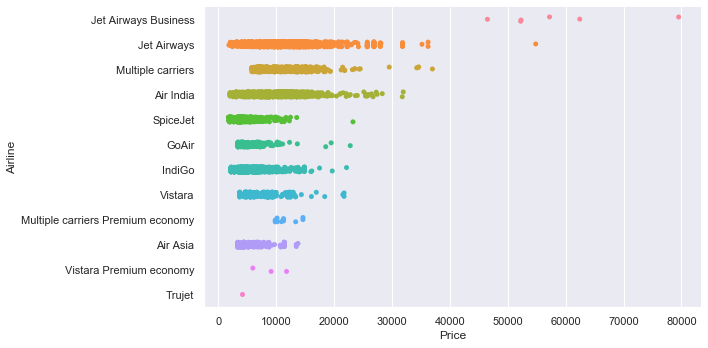

In [62]:
sns.catplot(x='Price',y='Airline', data=train_data.sort_values('Price',ascending=False),aspect=2)

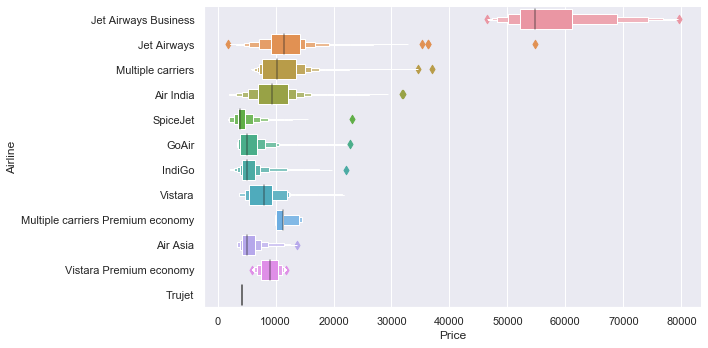

In [63]:
sns.catplot(x='Price',y='Airline', data=train_data.sort_values('Price',ascending=False),aspect=2,kind='boxen')

**We can clearly see that Jet Airways Business is like an outlier here also there are lots of outliers in other Airlies also**

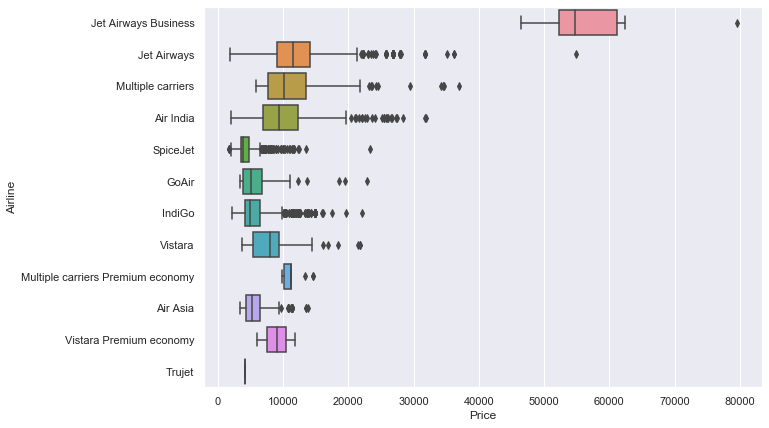

In [64]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Price',y='Airline', data=train_data.sort_values('Price',ascending=False))

**But Since these outliers are caused because they are business class and since the price of business class is high therefore we cannot drop these**

In [65]:
train_data.Airline.value_counts()

Jet Airways                          3788
IndiGo                               2048
Air India                            1732
Multiple carriers                    1196
SpiceJet                              817
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

We can see that the **Jet Airways Business** has a value count of 6 only and it is an outlier for us. And it'll affect our model a lot. Dropping the rows with **Jet Airways Business** seems to be a better choice here

For now we are not deleting Jet Airways Business because we want to compare the model performace before deleting it and after deleting it.

**One hot encoding the Airline column using** `pd.get_dummies`

In [66]:
Airline = train_data[['Airline']]
Airline.head()

,Airline
0,Air India
1,Jet Airways
2,IndiGo
3,IndiGo
4,SpiceJet


In [67]:
Airline = pd.get_dummies(Airline, drop_first=True) # dropping one column to save us from dummy variable trap
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [68]:
sorted(train_data.Airline.value_counts().index)

['Air Asia',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy']

**Here Air Asia is dropped**

In [69]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,1,5,7,25


### Cleaning our Source Column
Source is from where the plane starts is journey

In [70]:
train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2110
Mumbai       696
Chennai      380
Name: Source, dtype: int64

**Source VS Price**

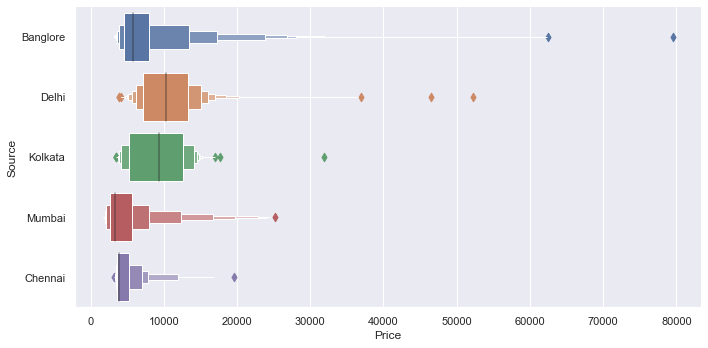

In [71]:
sns.catplot(x='Price',y='Source', data=train_data.sort_values('Price',ascending=False),aspect=2,kind='boxen')

**There are some outliers in Banglore and Delhi and kolkata while other data seems to be fine**

In [72]:
train_data[train_data.Price>40000]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
651,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,52229,1,3,2019,5,45,10,45,1,3,5,0
2901,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,2019,5,45,11,25,1,3,5,40
5327,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,2019,5,45,12,25,1,3,6,40
5393,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,1,3,2019,16,55,23,0,1,3,6,5
7292,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,No info,46490,3,3,2019,20,5,4,25,4,3,8,20
9639,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,No info,52285,6,3,2019,20,5,4,25,7,3,8,20
10280,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,2019,9,45,14,25,1,3,4,40


**Checking outliers using boxplot**

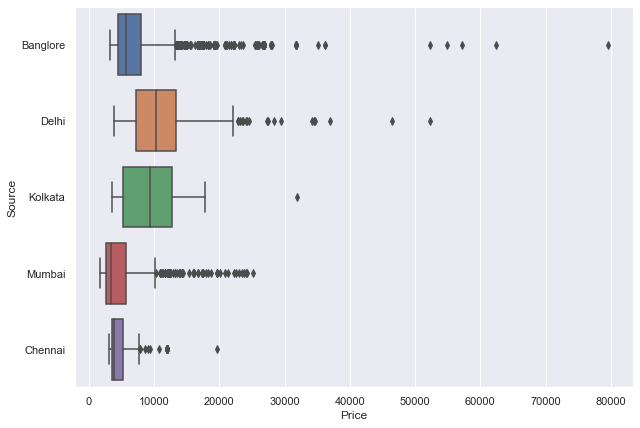

In [73]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Price',y='Source', data=train_data.sort_values('Price',ascending=False))

**Exploring the outliers data we found it to be having business class and since business class price is high we should not drop these**

**One hot encoding the Source column using** `pd.get_dummies`/

In [74]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True) # dropping one column to save us from dummy variable trap
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,1,0


In [75]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,1,5,7,25


**Here Banglore is dropped**

### Cleaning our Destination Column
Destination is where the plane arrives after completing its journey

In [76]:
train_data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     845
Hyderabad     696
Kolkata       380
Name: Destination, dtype: int64

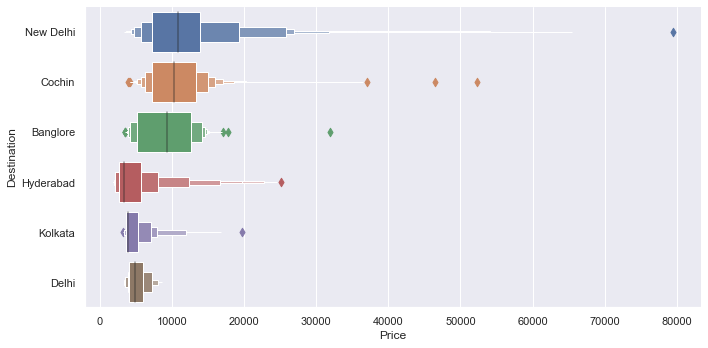

In [77]:
sns.catplot(x='Price',y='Destination', data=train_data.sort_values('Price', ascending=False), kind='boxen', aspect=2)

**There are some outliers in New Delhi, Banglore, Cochin and Kolkata while other seems fine**

In [78]:
# slicing dataframe using bool
train_data[(train_data.Price>40000) & (train_data.Destination=='New Delhi')] 

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
651,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,52229,1,3,2019,5,45,10,45,1,3,5,0
2901,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,2019,5,45,11,25,1,3,5,40
5327,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,2019,5,45,12,25,1,3,6,40
5393,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,1,3,2019,16,55,23,0,1,3,6,5
10280,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,2019,9,45,14,25,1,3,4,40


**Again after exploring the outliers data we found it to be having business class and since business class price is high we should not drop these**

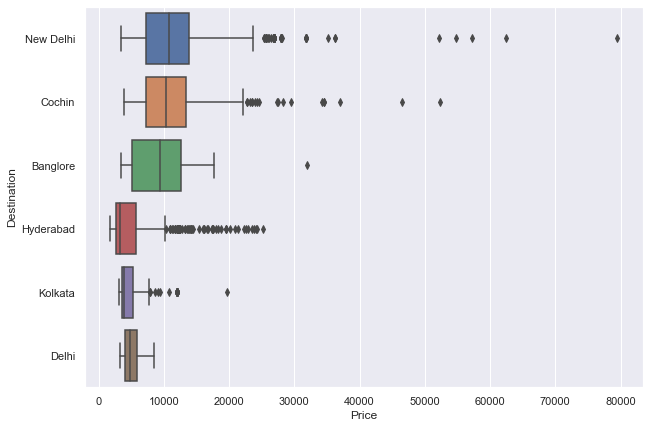

In [79]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Price',y='Destination', data = train_data.sort_values('Price',ascending=False))

**One hot encoding the Destination column using** `pd.get_dummies`/

In [80]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True) # dropping one column to save us from dummy variable trap
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,0


**Here Banglore is dropped**

In [81]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,1,5,7,25


### Cleaning our Route column
Route is the path that the plane took while travelling from source to destination

In [82]:
train_data.Route

0        CCU → IXR → BBI → BLR
1        DEL → LKO → BOM → COK
2              CCU → NAG → BLR
3              BLR → NAG → DEL
4                    CCU → BLR
                 ...          
10588                CCU → BLR
10589                CCU → BLR
10590                BLR → DEL
10591                BLR → DEL
10592    DEL → GOI → BOM → COK
Name: Route, Length: 10593, dtype: object

**The Route Column seems to be the most challenging task to transform into a suitable format**

- Route and Total stops are related with each other

**So we can basically drop the column but also the Route column can be crucial also as the price of fare is high for popular cities (if more passangers buy tickets for a particular city the price of that location is made higher) also the distance between the indermediate stops can be crucial for us.**

But since covering all those is a complex task therefore what we will do is that drop the Route column as Total_stops contains the number of stops the plane took to reach its destination.

In [83]:
train_data.drop(columns=['Route'],axis=1, inplace=True)

In [84]:
train_data.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
0,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,1,5,7,25


### Cleaning our Additional_Info column
Additional_Info column contains additional information about the flight like if the flight is business class, meals are included with flight charges, if check-in baggage charges included with the flight fare or not, etc.

In [85]:
train_data.Additional_Info.value_counts()

No info                         8293
In-flight meal not included     1944
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

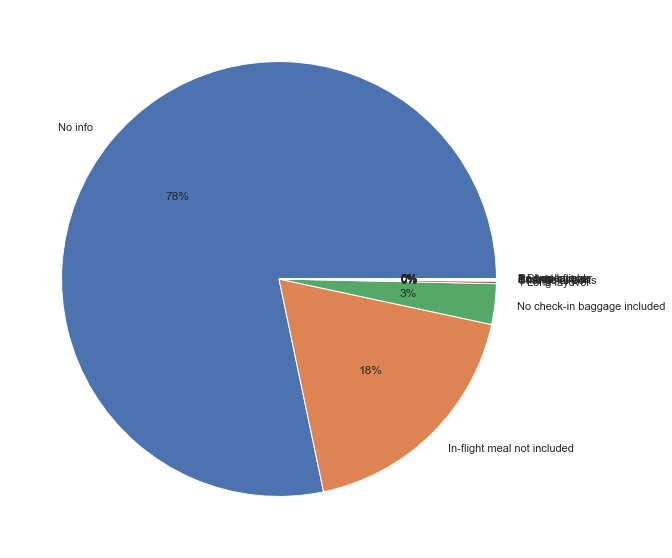

In [86]:
plt.figure(figsize=(10,10))
plt.pie(x=train_data.Additional_Info.value_counts().values,
       labels=train_data.Additional_Info.value_counts().index,
       autopct='%0.0f%%')
plt.show()

**Here we see that more that 80% of the data contains No info about the flight**

Therefore we can drop the Addition_Info column as it is of no use to us.

In [87]:
train_data.drop(columns=['Additional_Info'],axis=1, inplace=True)

In [88]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
0,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,1,5,7,25
1,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,10,6,19,0
2,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,12,5,5,25
3,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,1,3,4,45
4,SpiceJet,Kolkata,Banglore,non-stop,3873,24,6,2019,9,0,11,25,24,6,2,25


### Cleaning our Total_Stops column
Total stops contains all the intermediate stops the flight took while travelling from source to destination

In [89]:
train_data.Total_Stops.value_counts()

1 stop      5555
non-stop    3483
2 stops     1509
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

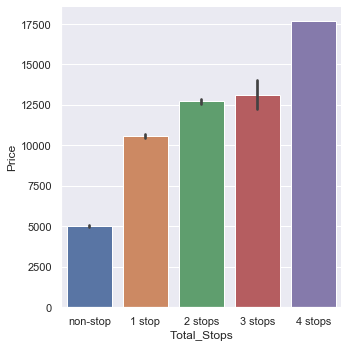

In [90]:
sns.catplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=True),kind='bar')

We can see that as the stops are increasing the price is also increased

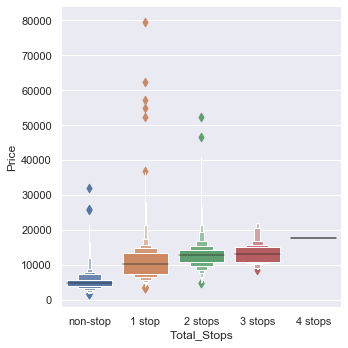

In [91]:
sns.catplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=True),kind='boxen')

**It seems there are also some outlier in 1 stops and 2 stops. Let's find out**

In [92]:
train_data[(train_data.Total_Stops=='1 stop') & (train_data.Price>40000)]

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
651,Jet Airways Business,Banglore,New Delhi,1 stop,52229,1,3,2019,5,45,10,45,1,3,5,0
2901,Jet Airways Business,Banglore,New Delhi,1 stop,79512,1,3,2019,5,45,11,25,1,3,5,40
5327,Jet Airways Business,Banglore,New Delhi,1 stop,62427,1,3,2019,5,45,12,25,1,3,6,40
5393,Jet Airways,Banglore,New Delhi,1 stop,54826,1,3,2019,16,55,23,0,1,3,6,5
10280,Jet Airways Business,Banglore,New Delhi,1 stop,57209,1,3,2019,9,45,14,25,1,3,4,40


**What we see that the some prices are high in 1 stop because they are Jet Airways Business flight and we know from our dataset Jet Airways Business flight fares are a lot more higher that other Airline flights**

**The Total_Stops column is an ordinal data**
Therfore we will Label Encode this using Label Encoding

#### LabelEncoding the Total_Stops Column by replacing the values with there ordered number

In [93]:
train_data.replace({'non-stop': 0,
                    '1 stop':1,
                    '2 stops':2,
                    '3 stops':3,
                    '4 stops':4
                   }, inplace=True)

In [94]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,Duration_mins
0,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,1,5,7,25
1,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,10,6,19,0
2,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,12,5,5,25
3,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,1,3,4,45
4,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,24,6,2,25


In [95]:
Airline.shape

(10593, 11)

In [96]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


### Finally we have cleaned our data and now we can concatenate the other dataframes that we have used for Airline, Source and Destination in column

In [97]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [98]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,...,0,0,0,1,0,0,0,0,0,0
1,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,...,0,0,1,0,0,1,0,0,0,0
2,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,...,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,...,0,0,0,0,0,0,0,0,0,1
4,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,...,0,0,0,1,0,0,0,0,0,0


#### Dropping the Airline, Source and Destination column as they are not useful to us now

In [99]:
data_train.drop(columns=['Airline','Source','Destination'], axis=1, inplace=True)

In [100]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2,7662,1,5,2019,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
1,2,13882,9,6,2019,9,25,4,25,10,...,0,0,1,0,0,1,0,0,0,0
2,1,6218,12,5,2019,18,5,23,30,12,...,0,0,0,1,0,0,0,0,0,0
3,1,13302,1,3,2019,16,50,21,35,1,...,0,0,0,0,0,0,0,0,0,1
4,0,3873,24,6,2019,9,0,11,25,24,...,0,0,0,1,0,0,0,0,0,0


In [101]:
data_train.shape

(10593, 33)

**Dropping the Journey_year as all the data in Jouney_year is same i.e., 2019**

In [102]:
data_train.drop(columns=['Journey_year'],axis=1, inplace=True)

In [103]:
data_train.shape

(10593, 32)

### Loading test dataset

**We will do the same steps again with the test dataset.**

### Question: We could have combined the train and test dataset together and do the preprocessing. But why we've not done that?
### Answer: To prevent DATA LEAKAGE.
**Data Leakage means the train data will also have some knowledge about the test data which is supposed to be unknown to the train data. This data leakage can cause overfitting.**

In [104]:
test_data = pd.read_excel("test/test.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Preprocessing test dataset

**Refer to Preprocessing test dataset.ipynb for more specific details**

In [105]:
print("#### Test Data Preprocessing Started ####")

test_data.isnull().sum()
test_data.dropna(inplace=True,axis=0)
test_data.isnull().sum()
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.month
test_data['Journey_year'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.year
test_data.drop(columns=['Date_of_Journey'], axis=1, inplace=True)
# Extracting hour
test_data['Dep_hour'] = pd.to_datetime(test_data.Dep_Time,format='%H:%M').dt.hour
# Extracting minutes
test_data['Dep_min'] = pd.to_datetime(test_data.Dep_Time, format='%H:%M').dt.minute
test_data.drop(columns=['Dep_Time'],axis=1,inplace=True)
# Extracting hour
test_data['Arrival_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
# Extracting Minutes
test_data['Arrival_min'] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data = test_data.reset_index(drop=True)

def format_arrival_time(arrival_time):
    test_data['Arrival_day'] = 0
    test_data['Arrival_month'] = 0
    for i in range(arrival_time.shape[0]):
        try:
            test_data['Arrival_day'][i] = pd.to_datetime(arrival_time[i],format='%H:%M %d %b').day
            test_data['Arrival_month'][i] = pd.to_datetime(arrival_time[i],format='%H:%M %d %b').month
        except:
            test_data['Arrival_day'][i] = test_data.Journey_day[i]
            test_data['Arrival_month'][i] = test_data.Journey_month[i]
            
format_arrival_time(test_data.Arrival_Time)

count = 0
for i in range(0,test_data.shape[0]):
    if test_data.Journey_day[i] > test_data.Arrival_day[i]:
        count += 1

for i in range(0,test_data.shape[0]):
    if test_data.Journey_day[i] > test_data.Arrival_day[i]:
        test_data.drop(index=i,axis=0 ,inplace=True)
        
test_data = test_data.reset_index(drop=True)

count = 0
for i in range(0,test_data.shape[0]):
    if test_data.Journey_day[i] > test_data.Arrival_day[i]:
        count += 1

test_data.drop(columns=['Arrival_Time'],axis=1,inplace=True)

def transform_duraion(duration):
    test_data['Duration_hours'] = 0
    test_data['Duration_mins'] = 0
    for i in range(duration.shape[0]):
        if len(duration[i].split()) != 2: # Check if the duration contains both hour and mins
            if 'h' in duration[i]:
                duration[i] = duration[i].strip() + ' 0m' # Add 0 minute
            else:
                duration[i] = '0h ' + duration[i].strip() # Add 0 hour
                
        test_data['Duration_hours'][i] = int(duration[i].split(sep='h')[0])
        test_data['Duration_mins'][i] = int(duration[i].split(sep='m')[0].split()[-1])
        
transform_duraion(test_data.Duration)

test_data.drop(columns=['Duration'],axis=1,inplace=True)

Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True) # dropping one column to save us from dummy variable trap
Airline.insert(len(Airline.columns)-2,'Airline_Trujet',[0]*Airline.shape[0])
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True) # dropping one column to save us from dummy variable trap
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True) # dropping one column to save us from dummy variable trap
test_data.drop(columns=['Route'],axis=1, inplace=True)
test_data.drop(columns=['Additional_Info'],axis=1, inplace=True)

test_data.replace({'non-stop': 0,
                    '1 stop':1,
                    '2 stops':2,
                    '3 stops':3,
                    '4 stops':4
                   }, inplace=True)

data_test = pd.concat([test_data, Airline, Source, Destination], axis=1)
data_test.drop(columns=['Airline','Source','Destination'], axis=1, inplace=True)
data_test.drop(columns=['Journey_year'],axis=1, inplace=True)

print(data_test.shape)
print("#### Test Data Preprocessing Ended ####")

#### Test Data Preprocessing Started ####
(2648, 31)
#### Test Data Preprocessing Ended ####


### Training Data

In [106]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2,7662,1,5,5,50,13,15,1,5,...,0,0,0,1,0,0,0,0,0,0
1,2,13882,9,6,9,25,4,25,10,6,...,0,0,1,0,0,1,0,0,0,0
2,1,6218,12,5,18,5,23,30,12,5,...,0,0,0,1,0,0,0,0,0,0
3,1,13302,1,3,16,50,21,35,1,3,...,0,0,0,0,0,0,0,0,0,1
4,0,3873,24,6,9,0,11,25,24,6,...,0,0,0,1,0,0,0,0,0,0


### Testing Data

In [107]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,7,6,10,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,12,5,4,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,22,5,23,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,21,5,13,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,25,6,2,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection

Feature Selection is a technique to find out the best feature(s) among the all the featues available which will contribute and have good relation with target variable. Following are some of the feature selection methods.

**1. heatmap**<br>
**2. feature_importance_**<br>
**3. SelectKBest**

In [108]:
X = data_train.drop(columns=["Price"])
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Arrival_month,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2,1,5,5,50,13,15,1,5,7,...,0,0,0,1,0,0,0,0,0,0
1,2,9,6,9,25,4,25,10,6,19,...,0,0,1,0,0,1,0,0,0,0
2,1,12,5,18,5,23,30,12,5,5,...,0,0,0,1,0,0,0,0,0,0
3,1,1,3,16,50,21,35,1,3,4,...,0,0,0,0,0,0,0,0,0,1
4,0,24,6,9,0,11,25,24,6,2,...,0,0,0,1,0,0,0,0,0,0


In [109]:
y = data_train['Price']
y.head()

0     7662
1    13882
2     6218
3    13302
4     3873
Name: Price, dtype: int64

In [110]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Arrival_day', 'Arrival_month',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [111]:
test_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Arrival_day', 'Arrival_month', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [112]:
# Dropping Journey year from train_data and test_data also
train_data.drop(columns=['Journey_year'],axis=1,inplace=True)
test_data.drop(columns=['Journey_year'],axis=1,inplace=True)

### Correlation matrix

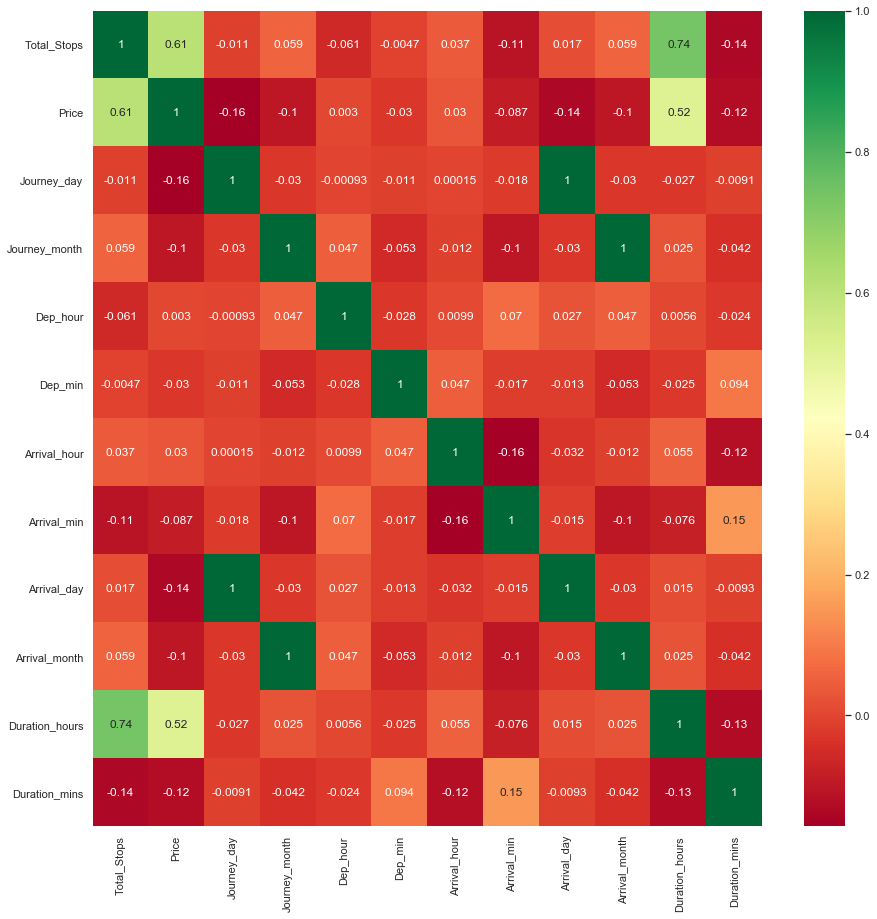

In [113]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train_data.corr(), annot=True, cmap='RdYlGn') # we are checking correlation among all the data attributes including our Price column

Here what we can do is that check for features that are highly correlated with each other using a threshold of .90 (90%) or high. Because both the features are doing the same task and therfore we can drop one of the independent features.

High correlation between independent features may can multicollinearity.
- If degree of correlation between variables are high enough, it can cause problems when you fit the model and interpret the results.
- It can cause a great amount of changes in coefficient of independent variables.
- But it'll affect the Independent variable that are correlated. 

**NOTE: But it is better to understand the data domain and if the independent variables are important or not.**

**NOTE 2: For highly correlated data we can perform LASSO and Ridge regression that has been designed for the same purpose.** 

### Important features using ExtraTreesRegressor
`sklearn.ensemble.ExtraTreesRegressor`

In [114]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [115]:
selection.feature_importances_

array([2.28002423e-01, 7.39113309e-02, 2.83264324e-02, 2.17341760e-02,
       2.06353089e-02, 2.11450864e-02, 1.76244966e-02, 6.93425181e-02,
       2.71220602e-02, 1.17650435e-01, 1.61923118e-02, 9.42571652e-03,
       1.98349911e-03, 1.95659317e-02, 1.41146463e-01, 6.92557533e-02,
       1.87843142e-02, 8.29154749e-04, 3.03168190e-03, 1.00661243e-04,
       5.22176554e-03, 6.73750041e-05, 5.12438518e-04, 1.26185469e-02,
       3.13262069e-03, 7.13052884e-03, 1.15909002e-02, 1.85088072e-02,
       7.41256593e-03, 4.82668879e-04, 2.75120278e-02])

**This does not look give any information lets plot the graph for important features for better visualization**

In [116]:
feature_importances = pd.DataFrame(data={'Features':X.columns,
                                         'feature_importances':selection.feature_importances_
                                        })
feature_importances

,Features,feature_importances
0,Total_Stops,0.228002
1,Journey_day,0.073911
2,Journey_month,0.028326
3,Dep_hour,0.021734
4,Dep_min,0.020635
5,Arrival_hour,0.021145
6,Arrival_min,0.017624
7,Arrival_day,0.069343
8,Arrival_month,0.027122
9,Duration_hours,0.117650


**Plotting top 20 most important features**

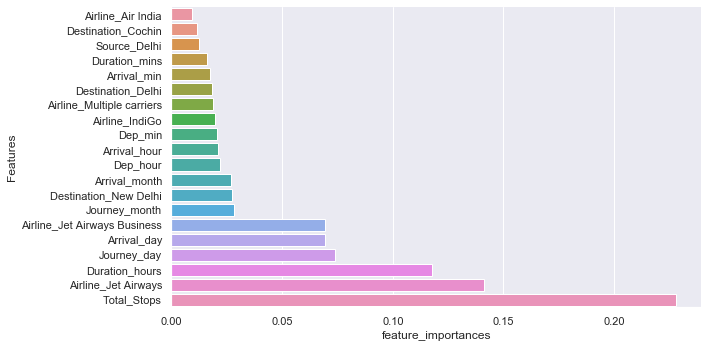

In [117]:
sns.catplot(y='Features',x='feature_importances',
            data=feature_importances.nlargest(20,columns=['feature_importances']).sort_values(
                'feature_importances',ascending=True),
            aspect=2, kind='bar')

**Here we can see that Total_Stops is playing the most important features.**

Here we are not dropping the less important features because these features seems to be less relevent here but the features are important in respect to the domain like Prices vary according to the Airline and source, destination.

## Model Training

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)

### Random Forest Regressor

#### Training

In [119]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

#### Predicting

In [120]:
y_pred = rf_reg.predict(X_test)

#### Checking train score

In [121]:
rf_reg.score(X_train, y_train)

0.9549130135241711

#### Checking test score

In [122]:
rf_reg.score(X_test, y_test)

0.8253215790337409

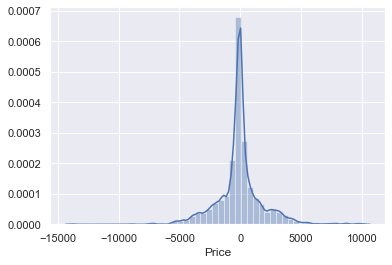

In [123]:
sns.distplot(y_test-y_pred)
plt.show()

**We can see that we are having a normal distribution curve**

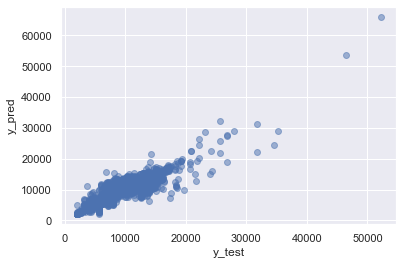

In [124]:
plt.scatter(y_test,y_pred, alpha=.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

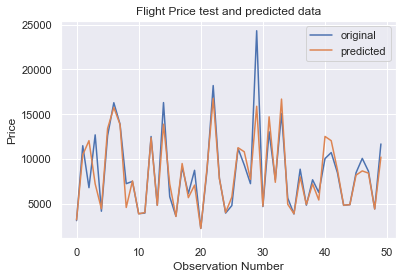

In [125]:
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()

### Checking model performance

In [126]:
from sklearn import metrics

In [127]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1178.8509737280049
MSE:  3560996.338054767
RMSE:  1887.0602369968922


In [128]:
print('r2 score: ', metrics.r2_score(y_test,y_pred))

r2 score:  0.8253215790337409


## HyperParameter tuning

For hyperparameter tuning we are going to use Randomized Search CV

In [129]:
# number of trees in random forest
n_estimatrs = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# number of features to consider at every split
max_features = ['auto','sqrt']
# maximum number of level's in tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30, num=6)]
# minimum number of samples required to split a node
min_samples_split = [2,4,10,15,100]
# minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [130]:
# create the random grid
random_grid = {'n_estimators': n_estimatrs,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
}

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
# cv: cross validation (5)
random_rf = RandomizedSearchCV(estimator=rf_reg,
                              param_distributions=random_grid,
                              scoring='neg_mean_squared_error',
                              n_iter=10,
                              cv=5,
                              random_state=42,
                              n_jobs=1,
                              verbose=2)

In [133]:
# random_rf.fit(X_train,y_train)

In [134]:
# random_rf.best_params_

In [135]:
import pickle
model = open('flight_fare_random_rf.pkl','rb')
random_rf = pickle.load(model)

In [136]:
predictions = random_rf.predict(X_test)

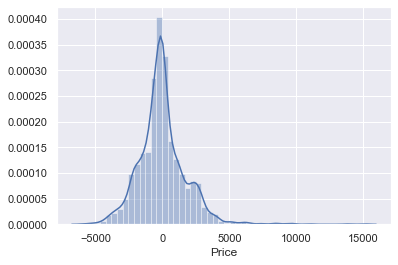

In [137]:
sns.distplot(y_test-predictions)
plt.show()

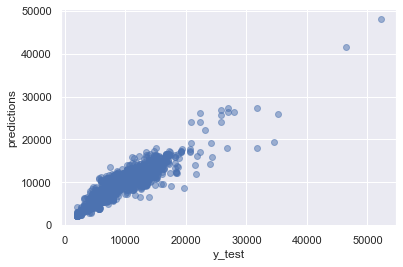

In [138]:
plt.scatter(y_test,predictions, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

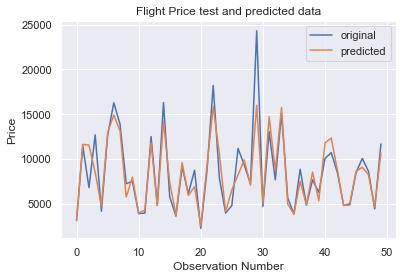

In [139]:
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, predictions[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()

In [140]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  1263.6243203083136
MSE:  3246062.26957307
RMSE:  1801.6831768024783


In [141]:
print('r2 score: ', metrics.r2_score(y_test,predictions))

r2 score:  0.8407701166250245


## Saving the model

In [141]:
# import pickle
# file = open('flight_fare_random_rf.pkl','wb')
# pickle.dump(random_rf.best_estimator_, file)

In [142]:
model = open('flight_fare_random_rf.pkl','rb')
forest = pickle.load(model)

In [143]:
y_prediction = forest.predict(X_test)

In [144]:
print('r2 score: ', metrics.r2_score(y_test,y_prediction))

r2 score:  0.8407701166250245


## Applying Lazy Prediction

### Problem: One of the problems of the model-building exercise is ‘How to decide which machine learning algorithm to apply ?

This is where Lazy Prediction comes into the picture. Lazy Prediction is a machine learning library available in python that can quickly provide us with performances of multiple standard classifications or regression models on multiple performance matrices.

**Since we are working on a Regression task we will use Regressor models.**

In [142]:
#we need to convert the data frames to arrays to work with the code below
X_train_arr, Y_train_arr = X_train.to_numpy(), y_train.to_numpy() 
X_test_arr, Y_test_arr = X_test.to_numpy(), y_test.to_numpy()

In [143]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_arr,X_test_arr,Y_train_arr,Y_test_arr)
models.head(10)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:35<00:00,  2.27s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.85,0.85,1757.25,2.03
HistGradientBoostingRegressor,0.84,0.84,1789.42,2.96
LGBMRegressor,0.84,0.84,1811.09,0.26
RandomForestRegressor,0.82,0.82,1900.02,4.58
BaggingRegressor,0.81,0.82,1931.56,0.78
GradientBoostingRegressor,0.78,0.78,2103.09,1.60
KNeighborsRegressor,0.78,0.78,2113.85,1.58
ExtraTreesRegressor,0.77,0.77,2142.16,6.09
ExtraTreeRegressor,0.73,0.73,2347.91,0.10


**But for now I know that XGBRegression performs good here.**

In [144]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
xgbPredictions = model.predict(X_test)
print('Training Score: ',model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))

Training Score:  0.9365903339586223
Test Score: 0.8483782129263159


In [146]:
print('MAE: ', metrics.mean_absolute_error(y_test,xgbPredictions))
print('MSE: ', metrics.mean_squared_error(y_test,xgbPredictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,xgbPredictions)))

MAE:  1127.059012844631
MSE:  3090963.5291642617
RMSE:  1758.113628058284


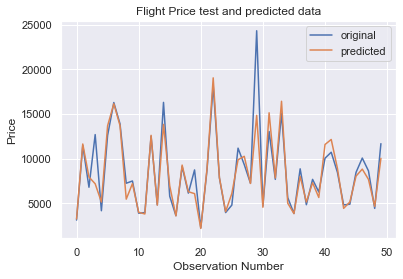

In [147]:
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, xgbPredictions[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()